# Groupe 3 : Projet Machine Learning

## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

In [2]:
dataset = pd.read_csv('scitweets_export.tsv', sep='\t')
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


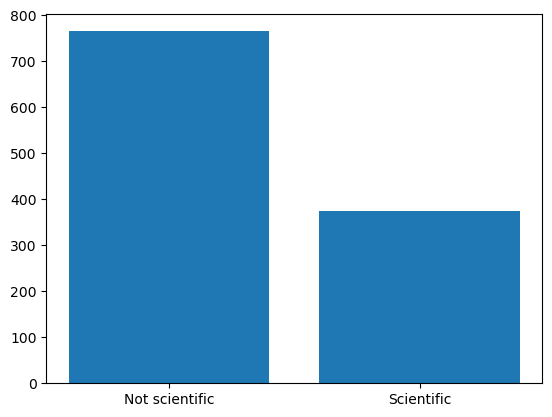

In [3]:
not_scientific = dataset.where(dataset['science_related'] == 0)
scientific = dataset.where(dataset['science_related'] == 1)

fig, ax = plt.subplots()
ax.bar(['Not scientific', 'Scientific'], [not_scientific['tweet_id'].count(), scientific['tweet_id'].count()])
plt.show()

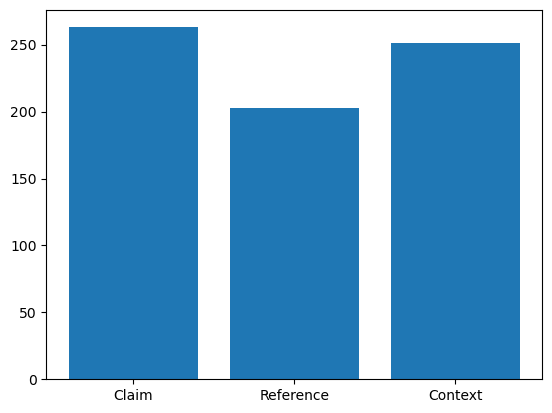

In [4]:
fig, ax = plt.subplots()
ax.bar(['Claim', "Reference", "Context"],
       [scientific.where(scientific['scientific_claim'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_reference'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_context'] == 1)['tweet_id'].count()])
plt.show()

## Prétraitement

On met tout en minuscule

In [5]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower())
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",can any gynecologist with cancer experience ex...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",does daily routine help prevent problems with ...,1,1.0,0.0,0.0


### Lemmatization

download the packages

In [6]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tiziri-tamani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Remove the stopwords but not the negation words or the words that are important for the sentiment analysis

In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
work_to_keep = ['no', 'not', 'nor', 'too', 'very', 'against', 'but', 'don', 'don\'t', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

for word in work_to_keep:
    stop_words.remove(word)

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the links

In [8]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        if 'http' in word or 'www' in word:
            continue
        new_text.append(word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Transform the emojis into text

In [9]:
import emoji

# Parcourir les indices et modifier directement les valeurs dans le DataFrame
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = emoji.demojize(line['text'])

# Afficher les premières lignes du DataFrame pour vérifier les modifications
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym :basketball::fle...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the non-alphabetic characters except the #

In [10]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        new_word = ""
        for l in word:
            if l.isalpha() or l in ['#', "'", '?', '!'] :
                new_word += l
            else:
                new_word += ' '
        new_text.append(new_word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym basketball fle...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch lock highs lead sleeping couch gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove multiple spaces

In [11]:
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = ' '.join(line['text'].split())

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore guess that's sign recent treadm...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym basketball flexe...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch lock highs lead sleeping couch gotta sto...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


## Vectorisation des textes

(TF-IDF)

## Lemmatization 

In [12]:
# #lemmatization  avec nltk 
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Télécharger les ressources nécessaires (à faire une seule fois)
# nltk.download('punkt')
# nltk.download('wordnet')

# # Initialiser le lemmatiseur
# lemmatizer = WordNetLemmatizer()

# def lemmatize_text_nltk(text):
#     # Tokeniser le texte
#     tokens = word_tokenize(text, language='english')
#     # Lemmatiser chaque token
#     lemmas = [lemmatizer.lemmatize(token) for token in tokens]
#     # Rejoindre les lemmes en une seule chaîne de caractères
#     return ' '.join(lemmas)

# # Appliquer la lemmatisation
# dataset['text_lemmatized'] = dataset['text'].apply(lemmatize_text_nltk)

In [13]:
### import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import contractions
import enchant
from enchant.checker import SpellChecker

# Charger le modèle de langue anglaise de spaCy
nlp = spacy.load('en_core_web_sm')

# Initialiser le correcteur orthographique avec enchant
d = enchant.Dict("en_US")

def correct_spelling(text):
    """Corrige les fautes d'orthographe avec enchant."""
    checker = SpellChecker("en_US")
    checker.set_text(text)
    for error in checker:
        if error.suggest():  # S'il y a des suggestions
            error.replace(error.suggest()[0])  # Remplace par la première suggestion
    return checker.get_text()

def lemmatize_text(text):
    """Pipeline de prétraitement : Correction → Contractions → Lemmatisation."""
    # Étape 1: Correction orthographique
    text = correct_spelling(text)
    
    # Étape 2: Gestion des contractions (ex: "that's" → "that is")
    text = contractions.fix(text)
    
    # Étape 3: Remplacement manuel des 's résiduels (optionnel)
    text = text.replace("'s", " be")
    
    # Étape 4: Lemmatisation avec spaCy
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

# Appliquer la lemmatisation à la colonne 'text'
dataset['text_lemmatized'] = dataset['text'].apply(lemmatize_text)

# Afficher les résultats
print("Avant la lemmatisation :")
print(dataset['text'].head())
print("\nAprès la lemmatisation :")
print(dataset['text_lemmatized'].head())

Avant la lemmatisation :
0    knees bit sore guess that's sign recent treadm...
1    mcdonald's breakfast stop gym basketball flexe...
2    gynecologist cancer experience explain dangers...
3    couch lock highs lead sleeping couch gotta sto...
4    daily routine help prevent problems bipolar di...
Name: text, dtype: object

Après la lemmatisation :
0    knee bit sore guess that be sign recent tread ...
1    McDonald be breakfast stop gym basketball flex...
2    gynecologist cancer experience explain danger ...
3    couch lock high lead sleep couch get to stop shit
4    daily routine help prevent problem bipolar dis...
Name: text_lemmatized, dtype: object


In [14]:
#!pip install contractions
#!pip install pyenchant

#!pip install pyenchant --upgrade


## Vectorisation 

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Diviser les données en ensembles d'entraînement et de test
X = dataset['text_lemmatized']  # Utiliser uniquement la colonne 'text' comme feature
y_binary = dataset['science_related']  # Étiquette binaire (scientifique ou non)

# Diviser les données AVANT la vectorisation
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Vectorisation : apprendre le vocabulaire et les poids TF-IDF uniquement sur les données d'entraînement
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000000)
X_train_vec = vectorizer.fit_transform(X_train)  # Apprentissage et transformation sur l'entraînement

# Appliquer la transformation aux données de test (sans réapprendre)
X_test_vec = vectorizer.transform(X_test)

In [16]:
print("Shape de la matrice TF-IDF :", X_train_vec.shape)
feature_names = vectorizer.get_feature_names_out()
print("Exemples de features (n-grammes) :", feature_names[:10])

import pandas as pd

# Exemple : afficher la matrice pour les 5 premiers tweets du training
tfidf_df = pd.DataFrame(X_train_vec[:5].toarray(), columns=feature_names)
print(tfidf_df.head())
# Afficher les poids pour 5 tweets et les 10 premières colonnes seulement
print(tfidf_df.iloc[:, :10])


Shape de la matrice TF-IDF : (912, 15792)
Exemples de features (n-grammes) : ['ab' 'ab rr' 'abash' 'abash get' 'abbotslangley' 'abbotslangley arrest'
 'abc' 'abc cabinetwork' 'abc new' 'abe']
    ab  ab rr  abash  abash get  abbotslangley  abbotslangley arrest  abc  \
0  0.0    0.0    0.0        0.0            0.0                   0.0  0.0   
1  0.0    0.0    0.0        0.0            0.0                   0.0  0.0   
2  0.0    0.0    0.0        0.0            0.0                   0.0  0.0   
3  0.0    0.0    0.0        0.0            0.0                   0.0  0.0   
4  0.0    0.0    0.0        0.0            0.0                   0.0  0.0   

   abc cabinetwork  abc new  abe  ...  zero christine  zika  zika virus  \
0              0.0      0.0  0.0  ...             0.0   0.0         0.0   
1              0.0      0.0  0.0  ...             0.0   0.0         0.0   
2              0.0      0.0  0.0  ...             0.0   0.0         0.0   
3              0.0      0.0  0.0  ...        

## PCA PROJECTION

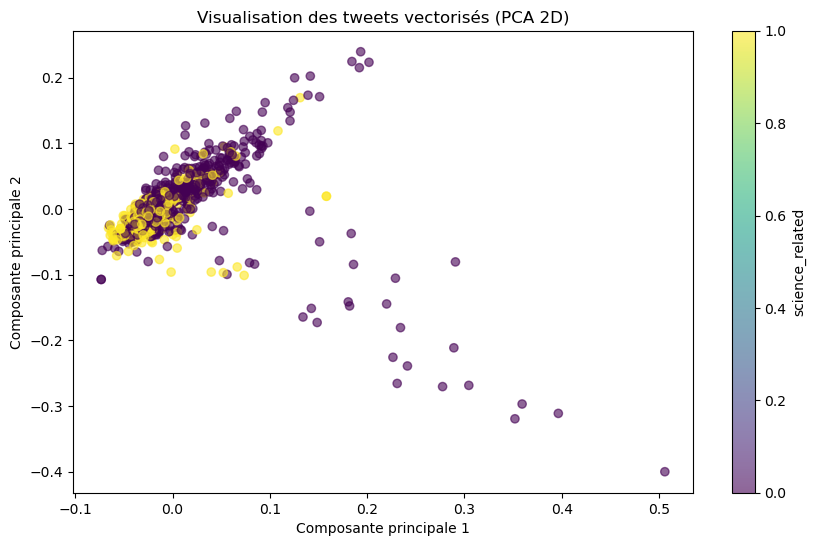

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire la dimension à 2D avec PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vec.toarray())  # Convertir la matrice creuse en tableau dense

# Visualiser les données en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='science_related')
plt.title('Visualisation des tweets vectorisés (PCA 2D)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

## visualisation avec tsne 

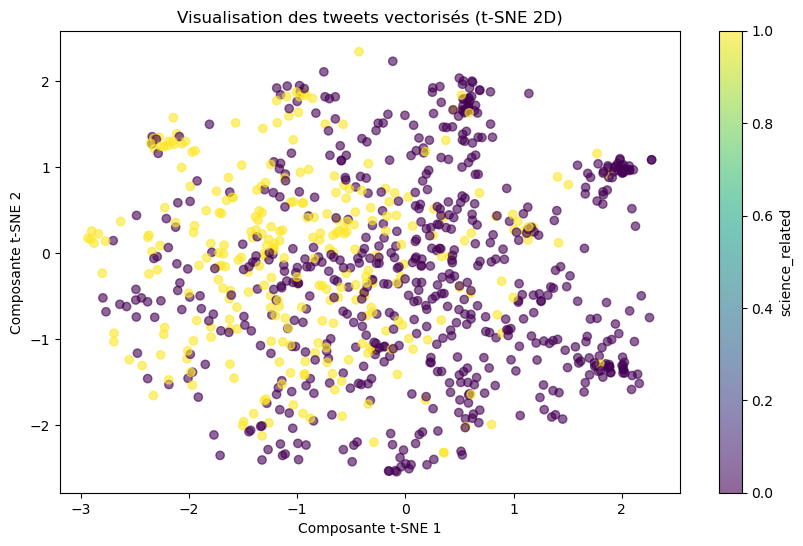

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Réduire la dimension à 2D avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_train_tsne = tsne.fit_transform(X_train_vec.toarray())

# Visualiser les données en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='science_related')
plt.title('Visualisation des tweets vectorisés (t-SNE 2D)')
plt.xlabel('Composante t-SNE 1')
plt.ylabel('Composante t-SNE 2')
plt.show()

## visualisation avec UMAP
#### les donners sont tres corrélé je pense 

2025-03-24 11:15:44.728185: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 11:15:44.749776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742811344.771907  165818 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742811344.778682  165818 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742811344.796837  165818 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

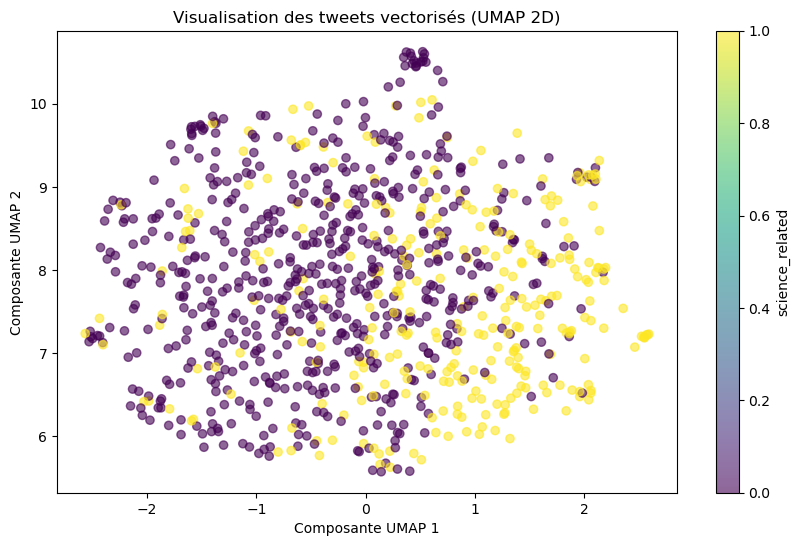

In [19]:
import umap
import umap.umap_ as umap

# Réduire la dimension à 2D avec UMAP
umap_reducer = umap.UMAP(random_state=42)
X_train_umap = umap_reducer.fit_transform(X_train_vec.toarray())

# Visualiser les données en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(label='science_related')
plt.title('Visualisation des tweets vectorisés (UMAP 2D)')
plt.xlabel('Composante UMAP 1')
plt.ylabel('Composante UMAP 2')
plt.show()

## TF_IDF projection 

In [20]:
import numpy as np

# Obtenir les mots (features) et leurs poids TF-IDF
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_train_vec.mean(axis=0)).flatten()

# Associer les mots à leurs scores TF-IDF
word_tfidf = list(zip(feature_names, tfidf_scores))

# Trier par score TF-IDF
word_tfidf_sorted = sorted(word_tfidf, key=lambda x: x[1], reverse=True)

# Afficher les 20 mots les plus importants
print("Top 20 mots les plus importants :")
for word, score in word_tfidf_sorted[:100]:
    print(f"{word}: {score:.4f}")

Top 20 mots les plus importants :
stop: 0.0157
be: 0.0138
support: 0.0128
not: 0.0104
report: 0.0085
people: 0.0071
you: 0.0071
science: 0.0066
get: 0.0064
new: 0.0062
increase: 0.0059
lead: 0.0056
face: 0.0054
because: 0.0051
do: 0.0047
need: 0.0046
study: 0.0045
one: 0.0045
good: 0.0045
change: 0.0043
but: 0.0043
go: 0.0043
we: 0.0042
via: 0.0041
like: 0.0041
help: 0.0041
life: 0.0040
job: 0.0039
health: 0.0037
day: 0.0037
heart: 0.0037
woman: 0.0037
news: 0.0037
cancer: 0.0036
man: 0.0036
time: 0.0036
use: 0.0035
say: 0.0035
with: 0.0035
rt: 0.0035
treat: 0.0034
see: 0.0034
today: 0.0034
make: 0.0034
research: 0.0033
find: 0.0033
great: 0.0033
trump: 0.0033
no: 0.0033
prevent: 0.0032
way: 0.0032
could: 0.0032
cause: 0.0032
right: 0.0031
promote: 0.0031
do not: 0.0031
work: 0.0031
world: 0.0031
year: 0.0031
well: 0.0030
look: 0.0030
take: 0.0030
show: 0.0030
brain: 0.0029
break: 0.0029
can: 0.0029
state: 0.0029
face with: 0.0029
would: 0.0029
eye: 0.0029
please: 0.0028
medium: 0.0028

In [21]:
from sklearn.feature_selection import chi2

# Calculer les scores du chi-deux et les p-values
chi2_scores, p_values = chi2(X_train_vec, y_train)

# Afficher les résultats
import numpy as np

# Associer les mots à leurs scores et p-values
feature_names = vectorizer.get_feature_names_out()
chi2_results = list(zip(feature_names, chi2_scores, p_values))

# Trier par score du chi-deux (du plus élevé au plus faible)
chi2_results_sorted = sorted(chi2_results, key=lambda x: x[1], reverse=True)

# Afficher les 10 mots les plus significatifs
print("Top 10 mots les plus significatifs (chi-deux) :")
for word, score, p_value in chi2_results_sorted[:50]:
    print(f"{word}: chi2 = {score:.2f}, p-value = {p_value:.4f}")

Top 10 mots les plus significatifs (chi-deux) :
study: chi2 = 6.71, p-value = 0.0096
stop: chi2 = 5.34, p-value = 0.0208
health: chi2 = 4.97, p-value = 0.0258
climate: chi2 = 4.10, p-value = 0.0429
brain: chi2 = 3.65, p-value = 0.0561
cancer: chi2 = 3.52, p-value = 0.0606
research: chi2 = 3.44, p-value = 0.0638
risk: chi2 = 3.35, p-value = 0.0673
eureka: chi2 = 3.29, p-value = 0.0696
eureka mag: chi2 = 3.29, p-value = 0.0696
mag: chi2 = 3.29, p-value = 0.0696
climate change: chi2 = 3.26, p-value = 0.0712
reduce: chi2 = 2.99, p-value = 0.0839
support: chi2 = 2.90, p-value = 0.0884
scientist: chi2 = 2.79, p-value = 0.0950
change: chi2 = 2.56, p-value = 0.1095
infection: chi2 = 2.56, p-value = 0.1096
treatment: chi2 = 2.53, p-value = 0.1116
science: chi2 = 2.43, p-value = 0.1190
change people: chi2 = 2.27, p-value = 0.1322
pain change: chi2 = 2.27, p-value = 0.1322
suicide: chi2 = 2.14, p-value = 0.1435
new study: chi2 = 2.11, p-value = 0.1462
poverty: chi2 = 2.11, p-value = 0.1464
sleep:

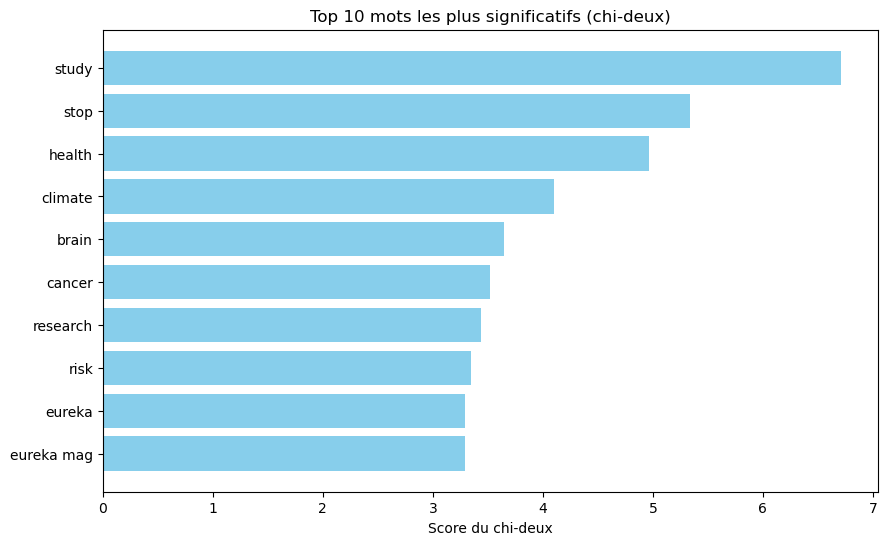

In [22]:
import matplotlib.pyplot as plt

# Extraire les 10 premiers mots et leurs scores
top_words = [word for word, _, _ in chi2_results_sorted[:10]]
top_scores = [score for _, score, _ in chi2_results_sorted[:10]]

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_scores, color='skyblue')
plt.xlabel('Score du chi-deux')
plt.title('Top 10 mots les plus significatifs (chi-deux)')
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher le mot le plus significatif en haut
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Séparation features/labels
X = dataset['text_lemmatized']
y = dataset['science_related']

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Vectorisation TF-IDF uniquement sur l'entraînement
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. SMOTE sur les données vectorisées
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

# Vérif de la nouvelle shape :
print("Avant SMOTE :", X_train_vec.shape, "-> Classements :", y_train.value_counts().to_dict())
print("Après SMOTE :", X_train_resampled.shape, "-> Classements :", pd.Series(y_train_resampled).value_counts().to_dict())


Avant SMOTE : (912, 15792) -> Classements : {0: 619, 1: 293}
Après SMOTE : (1238, 15792) -> Classements : {0: 619, 1: 619}



===== Logistic Regression =====
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       146
           1       0.74      0.70      0.72        82

    accuracy                           0.80       228
   macro avg       0.79      0.78      0.78       228
weighted avg       0.80      0.80      0.80       228

Accuracy: 0.8026315789473685


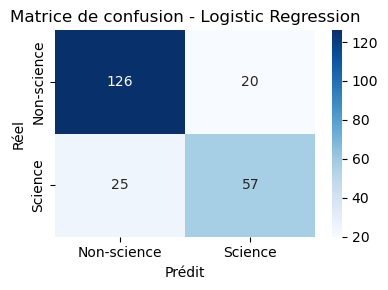


===== Naive Bayes =====
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       146
           1       0.66      0.79      0.72        82

    accuracy                           0.78       228
   macro avg       0.77      0.78      0.77       228
weighted avg       0.80      0.78      0.78       228

Accuracy: 0.7807017543859649


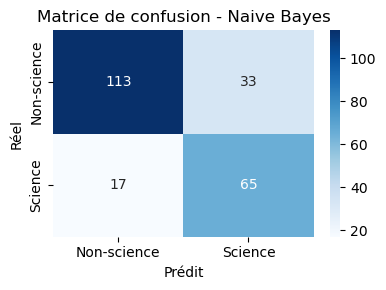


===== SVM =====
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       146
           1       0.76      0.74      0.75        82

    accuracy                           0.82       228
   macro avg       0.81      0.81      0.81       228
weighted avg       0.82      0.82      0.82       228

Accuracy: 0.8245614035087719


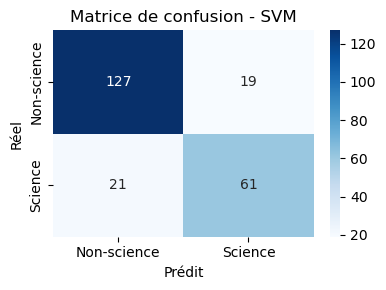


===== Random Forest =====
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       146
           1       0.71      0.65      0.68        82

    accuracy                           0.78       228
   macro avg       0.76      0.75      0.75       228
weighted avg       0.77      0.78      0.77       228

Accuracy: 0.7763157894736842


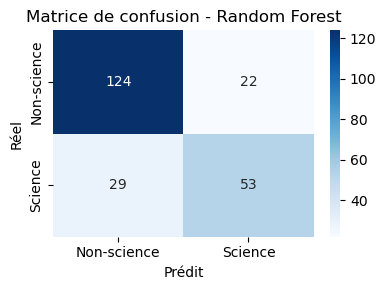

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Entraîner sur les données équilibrées
    model.fit(X_train_resampled, y_train_resampled)
    
    # Prédiction sur le test set
    y_pred = model.predict(X_test_vec)
    
    # Évaluation
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-science', 'Science'], yticklabels=['Non-science', 'Science'])
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.tight_layout()
    plt.show()
